## LIBRARIES

In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## FUNCTIONS

In [25]:
# Function to generate exponentially distributed random numbers clipped between 0 and a maximum value
def exp(m, n):
    expon = np.random.exponential(scale=m)
    # Clip the numbers to be within the range (0 to n)
    clipped_number = np.clip(expon, 0, n)
    return clipped_number

# Simulate a queuing system for a specified time duration
def simulate_queuing_system(runtime):
    # Initialize an empty DataFrame with columns
    col = ['id', 'it', 'at', 'st', 'sb', 'se', 'wt', 'spent', 'idle']
    df = pd.DataFrame(columns=col)
    
    # Initialize the first row representing the first customer
    for m in col:
        df.loc[0, m] = 0
    df.loc[0, 'id'] = 1
    df.loc[0, 'st'] = exp(4, 6)  # Service time follows an exponential distribution with mean 4 and max 6 
    df.loc[0, 'se'] = df.loc[0, 'st']
    df.loc[0, 'wt'] = df.loc[0, 'sb'] - df.loc[0, 'at']
    df.loc[0, 'spent'] = df.loc[0, 'se'] - df.loc[0, 'at']
    
    # Iterate to simulate arrivals and service times of customers until the total service time exceeds runtime
    i = 1
    while df['se'].sum() < runtime:
        df.loc[i, 'id'] = i + 1
        df.loc[i, 'it'] = exp(5, 8)  # Interarrival time follows an exponential distribution with mean 5 and max 8
        df.loc[i, 'at'] = df.loc[i, 'it'] + df.loc[i - 1, 'at']
        df.loc[i, 'st'] = exp(4, 6)
        df.loc[i, 'sb'] = max(df.loc[i - 1, 'se'], df.loc[i, 'at'])
        df.loc[i, 'se'] = df.loc[i, 'sb'] + df.loc[i, 'st']
        df.loc[i, 'wt'] = df.loc[i, 'sb'] - df.loc[i, 'at']
        df.loc[i, 'spent'] = df.loc[i, 'se'] - df.loc[i, 'at']
        if df.loc[i - 1, 'se'] < df.loc[i, 'at']:
            df.loc[i, 'idle'] = df.loc[i, 'at'] - df.loc[i - 1, 'se']
        else:
            df.loc[i, 'idle'] = 0
        i += 1
    
    return df

## OUTPUT

In [27]:
# Set the duration of the simulation
runtime = float(input("Enter the time duration you want to simulate for: "))

# Simulate the queuing system
df = simulate_queuing_system(runtime)

# Display the DataFrame containing simulation results
print(df)

Enter the time duration you want to simulate for:  60


  id        it         at        st         sb         se        wt  \
0  1         0          0  5.242963          0   5.242963         0   
1  2  6.113183   6.113183  4.175303   6.113183  10.288485       0.0   
2  3   0.22094   6.334123  4.459965  10.288485   14.74845  3.954363   
3  4  1.170486   7.504609  5.104025   14.74845  19.852475  7.243841   
4  5  4.341765  11.846374  1.877318  19.852475  21.729794  8.006101   

       spent     idle  
0   5.242963        0  
1   4.175303  0.87022  
2   8.414327        0  
3  12.347866        0  
4    9.88342        0  


In [28]:
df.shape

(5, 9)

In [29]:
waiting_time_frequency = df['wt'].value_counts()

print(waiting_time_frequency)

0.000000    2
3.954363    1
7.243841    1
8.006101    1
Name: wt, dtype: int64


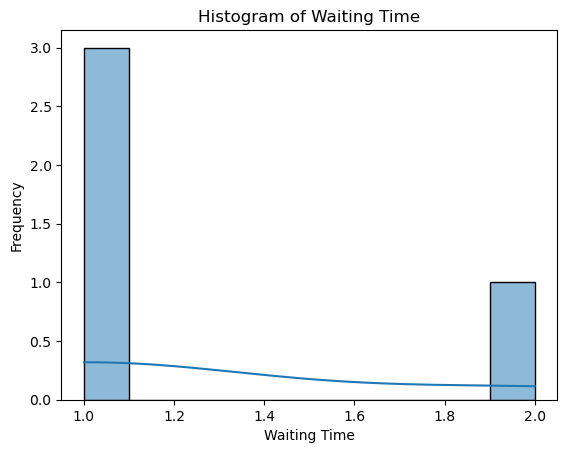

In [30]:
sns.histplot(data=waiting_time_frequency, bins=10, kde=True)
plt.xlabel('Waiting Time')
plt.ylabel('Frequency')
plt.title('Histogram of Waiting Time')
plt.show()